<a href="https://colab.research.google.com/github/gihantha-sanjana/CMP7005-Assingment-Work-Repo/blob/main/Beijing%20Multi-Site%20Air%20Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Direct to the DataSet Folder Path.

In [387]:
import os

# Change to the desired directory
os.chdir('/content/drive/My Drive/ColabNotebooks/DatasetCMP7005')

# Verify the current directory
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/My Drive/ColabNotebooks/DatasetCMP7005


Display All CSV files in my Google Drive Folder

In [388]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv']

In [389]:
df_list = [pd.read_csv(file) for file in csv_files]

In [390]:
df_merged = pd.concat(df_list, axis=0, ignore_index=True)

Merge the DataSet files into One.

In [391]:
df_merged

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
210380,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
210381,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
210382,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


# **Check for null values, data types, and overall structure.**

In [392]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       210384 non-null  int64  
 1   year     210384 non-null  int64  
 2   month    210384 non-null  int64  
 3   day      210384 non-null  int64  
 4   hour     210384 non-null  int64  
 5   PM2.5    205934 non-null  float64
 6   PM10     207010 non-null  float64
 7   SO2      205925 non-null  float64
 8   NO2      204903 non-null  float64
 9   CO       200261 non-null  float64
 10  O3       204970 non-null  float64
 11  TEMP     210232 non-null  float64
 12  PRES     210235 non-null  float64
 13  DEWP     210232 non-null  float64
 14  RAIN     210234 non-null  float64
 15  wd       209850 non-null  object 
 16  WSPM     210272 non-null  float64
 17  station  210384 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 28.9+ MB


Rename the Dataset Column Names

In [393]:
df_merged.rename(columns={'No': 'NO', 'year': 'YEAR', 'month': 'MONTH', 'day':'DAY','hour':'HOUR','SO2':'SULFER_DIOXIDE','NO2':'NITROGEN_DIOXIDE','CO':'CARBON_MONOXIDE','O3':'OZONE','PRES':'PRESPERATION','DEWP':'DEW_POINT','wd':'WIND_DIRECTION','WSPM':'WIND_SPEED','station':'STATION'}, inplace=True)

In [394]:
df_merged.head()

,NO,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SULFER_DIOXIDE,NITROGEN_DIOXIDE,CARBON_MONOXIDE,OZONE,TEMP,PRESPERATION,DEW_POINT,RAIN,WIND_DIRECTION,WIND_SPEED,STATION
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


# **Converting Object dtypes to category dtype for better Memory-effeciency and Performance.**

In [395]:
df_merged['WIND_DIRECTION'] = df_merged['WIND_DIRECTION'].astype('category')
df_merged['STATION'] = df_merged['STATION'].astype('category')

In [396]:
df_merged.dtypes

,0
NO,int64
YEAR,int64
MONTH,int64
DAY,int64
HOUR,int64
PM2.5,float64
PM10,float64
SULFER_DIOXIDE,float64
NITROGEN_DIOXIDE,float64
CARBON_MONOXIDE,float64


In [397]:
df_merged.isna().sum()/len(df_merged)*100

,0
NO,0.000000
YEAR,0.000000
MONTH,0.000000
DAY,0.000000
HOUR,0.000000
PM2.5,2.115180
PM10,1.603734
SULFER_DIOXIDE,2.119458
NITROGEN_DIOXIDE,2.605236
CARBON_MONOXIDE,4.811678


Drop the No Column becuase it is not Important.

In [398]:
df_merged.drop('NO', axis=1, inplace=True)

In [399]:
df_merged.head()

,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SULFER_DIOXIDE,NITROGEN_DIOXIDE,CARBON_MONOXIDE,OZONE,TEMP,PRESPERATION,DEW_POINT,RAIN,WIND_DIRECTION,WIND_SPEED,STATION
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Combined the Year, Month, Day and Hour Columns as a One Column in Dataset becuase we can do EDA easily by doing this.

In [400]:
#Combine the Columns
df_merged['DATETIME'] = pd.to_datetime(df_merged[['YEAR', 'MONTH', 'DAY', 'HOUR']])

#Remove the original columns
df_merged = df_merged.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR'])

df_merged.head()

,PM2.5,PM10,SULFER_DIOXIDE,NITROGEN_DIOXIDE,CARBON_MONOXIDE,OZONE,TEMP,PRESPERATION,DEW_POINT,RAIN,WIND_DIRECTION,WIND_SPEED,STATION,DATETIME
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00


In [401]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PM2.5             205934 non-null  float64       
 1   PM10              207010 non-null  float64       
 2   SULFER_DIOXIDE    205925 non-null  float64       
 3   NITROGEN_DIOXIDE  204903 non-null  float64       
 4   CARBON_MONOXIDE   200261 non-null  float64       
 5   OZONE             204970 non-null  float64       
 6   TEMP              210232 non-null  float64       
 7   PRESPERATION      210235 non-null  float64       
 8   DEW_POINT         210232 non-null  float64       
 9   RAIN              210234 non-null  float64       
 10  WIND_DIRECTION    209850 non-null  category      
 11  WIND_SPEED        210272 non-null  float64       
 12  STATION           210384 non-null  category      
 13  DATETIME          210384 non-null  datetime64[ns]
dtypes: c

Check the DataSet Rows

In [402]:
df_merged.shape[0]

210384

Check the DataSet Columns

In [350]:
df_merged.shape[1]

14

Checking the Missing Values in DataSet

In [403]:
df_merged.isna().sum()

,0
PM2.5,4450
PM10,3374
SULFER_DIOXIDE,4459
NITROGEN_DIOXIDE,5481
CARBON_MONOXIDE,10123
OZONE,5414
TEMP,152
PRESPERATION,149
DEW_POINT,152
RAIN,150


Checking the Precentage of Missing Values in DataSet

In [404]:
df_merged.isna().sum()/len(df_merged)*100

,0
PM2.5,2.115180
PM10,1.603734
SULFER_DIOXIDE,2.119458
NITROGEN_DIOXIDE,2.605236
CARBON_MONOXIDE,4.811678
OZONE,2.573390
TEMP,0.072249
PRESPERATION,0.070823
DEW_POINT,0.072249
RAIN,0.071298


check the Missing Values DataType

In [405]:
df_merged.isna().sum().dtypes

dtype('int64')

Checking the Missing Values in my Dataset using HeatMap in here Every yellow line indicates true it meaning where we have null values.

<Axes: >

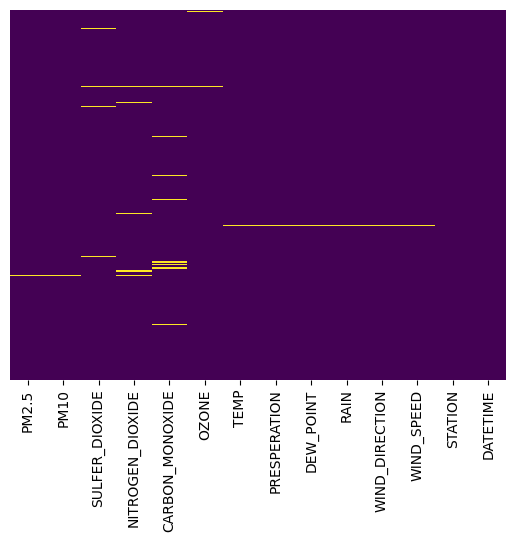

In [406]:
import seaborn as sns
sns.heatmap(df_merged.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

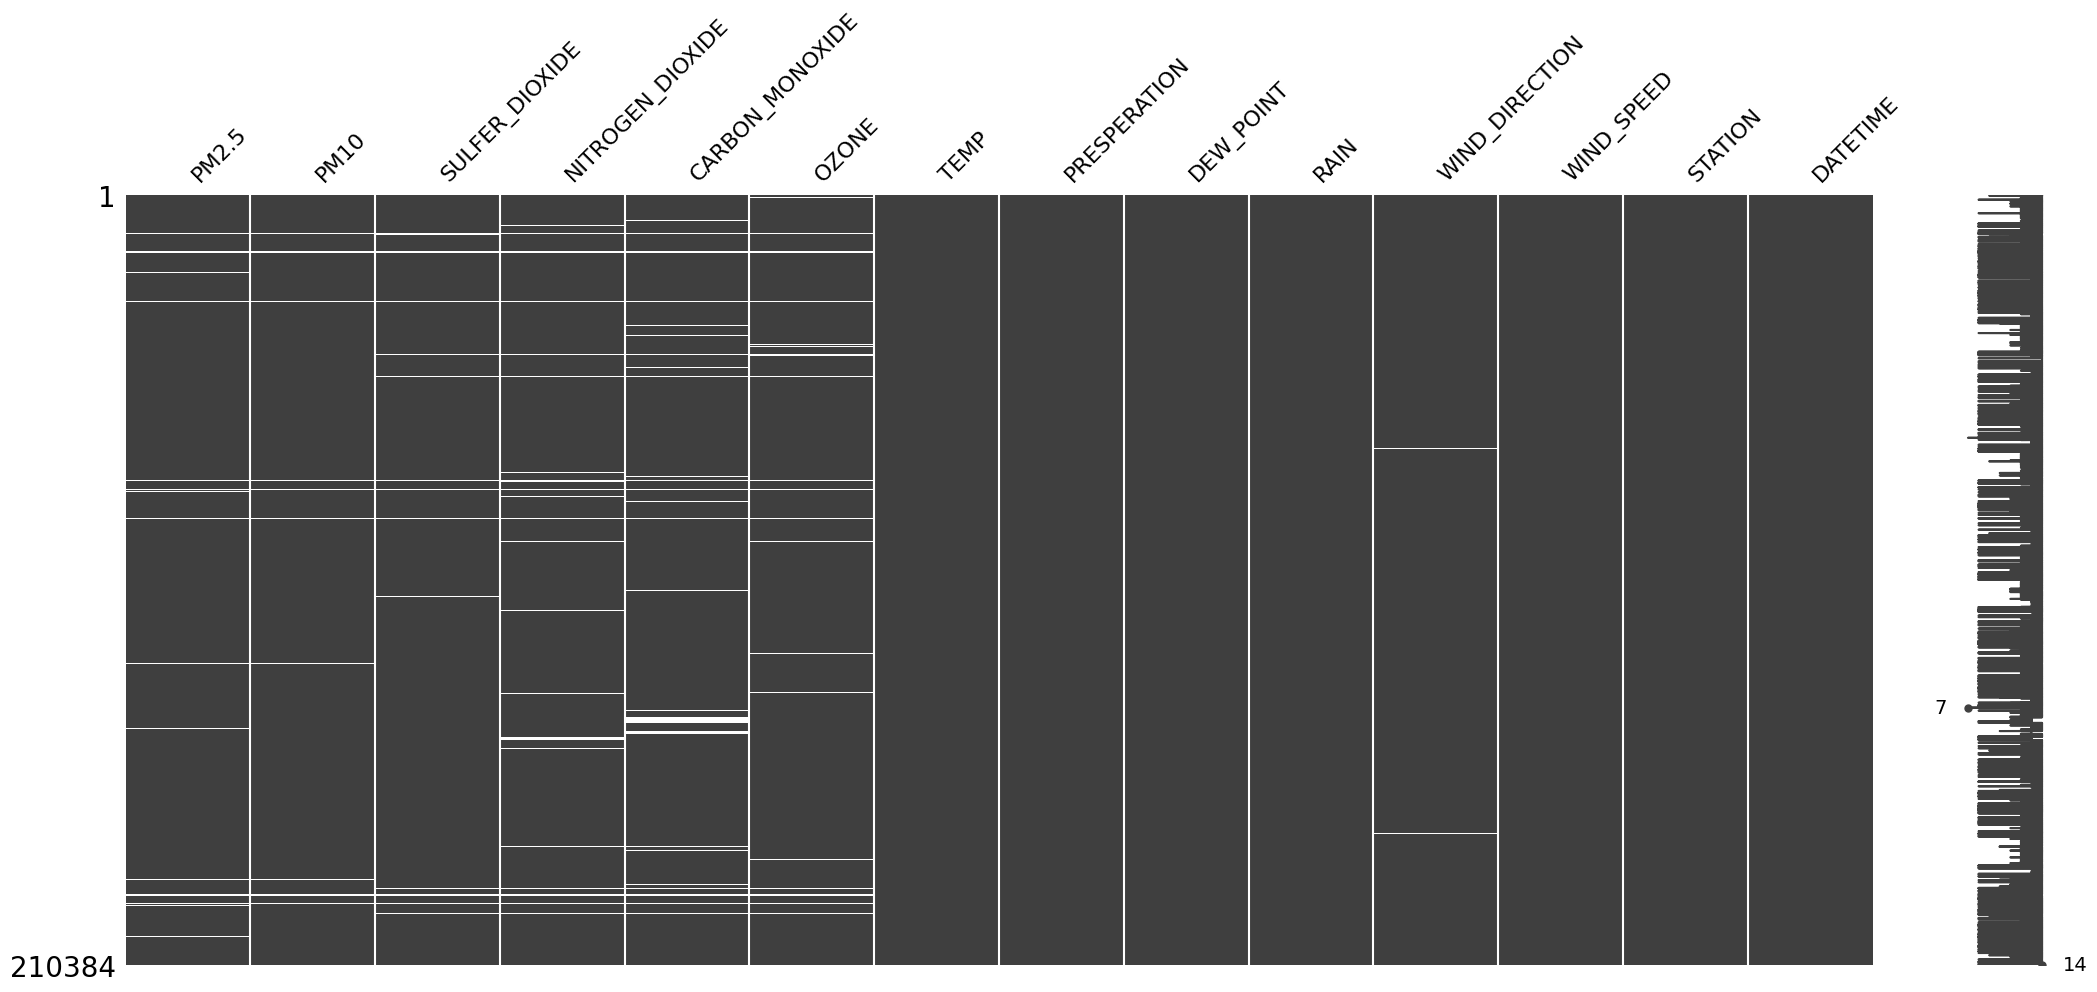

In [407]:
import missingno as msno
msno.matrix(df_merged)


# **Total missing values per variable**

In [408]:
data = df_merged.copy()
data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data.set_index('DATETIME', inplace=True)

Check Missing Year wise Carbon Monoxide Value using plot

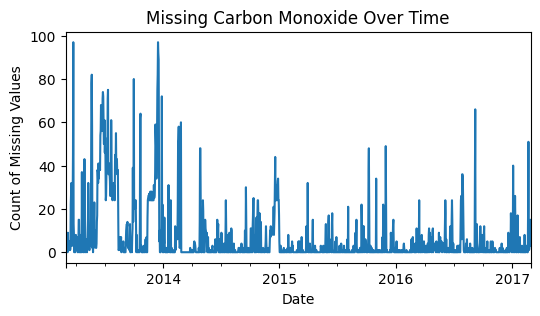

In [409]:
missing_CO = data['CARBON_MONOXIDE'].isnull().astype(int)
plt.figure(figsize=(6, 3))
missing_CO.resample('D').sum().plot(title="Missing Carbon Monoxide Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()

Check Total Missing Values Per Variable using Bar Plot.

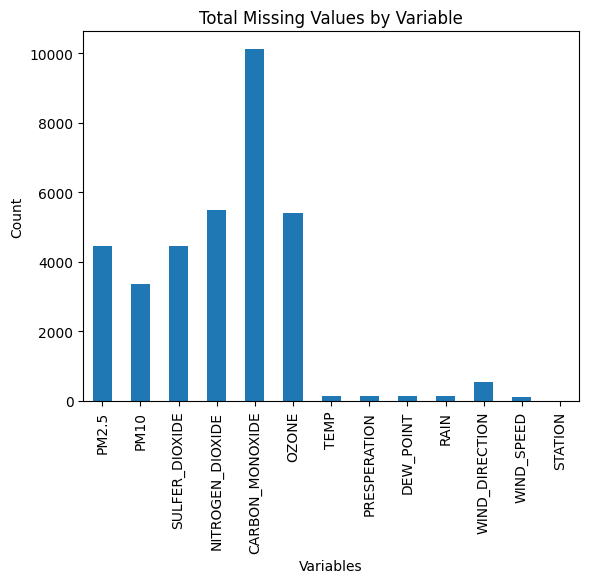

In [410]:
data.isnull().sum().plot(kind='bar', title='Total Missing Values by Variable', xlabel='Variables', ylabel='Count')
plt.show()

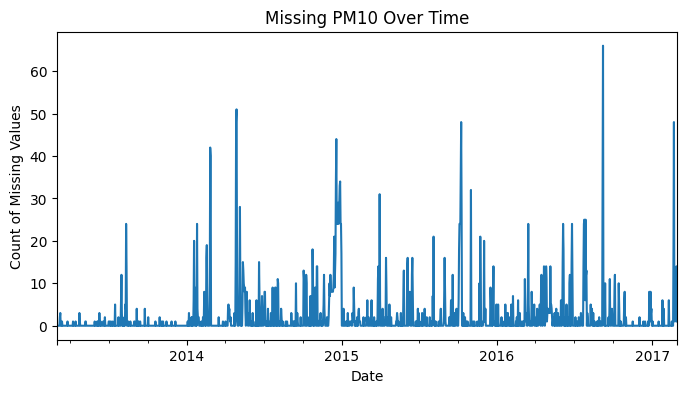

In [411]:
missing_PM25 = data['PM10'].isnull().astype(int)
plt.figure(figsize=(8, 4))
missing_PM25.resample('D').sum().plot(title="Missing PM10 Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()


# **Filling null values using KNN Imputer**

In [412]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Adjust neighbors as needed
target_cols = ['PM2.5', 'PM10', 'SULFER_DIOXIDE', 'NITROGEN_DIOXIDE', 'CARBON_MONOXIDE', 'OZONE', 'TEMP', 'PRESPERATION', 'DEW_POINT', 'RAIN', 'WIND_SPEED']
numerical_cols = [col for col in target_cols if col in data.columns]  # Ensure columns exist in the DataFrame
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

**Verify the null values are fill.**

In [413]:
print(data[numerical_cols].isnull().sum())

PM2.5               0
PM10                0
SULFER_DIOXIDE      0
NITROGEN_DIOXIDE    0
CARBON_MONOXIDE     0
OZONE               0
TEMP                0
PRESPERATION        0
DEW_POINT           0
RAIN                0
WIND_SPEED          0
dtype: int64


Check the Null Values Summary in Data Set

In [414]:
data.isna().sum()

,0
PM2.5,0
PM10,0
SULFER_DIOXIDE,0
NITROGEN_DIOXIDE,0
CARBON_MONOXIDE,0
OZONE,0
TEMP,0
PRESPERATION,0
DEW_POINT,0
RAIN,0


# **Convert Wind Direction into Quater-Winds**

In [415]:
direction_mapping = {
    'N': 0,         # North
    'NNE': 22.5,    # North-North-East
    'NE': 45,       # North-East
    'ENE': 67.5,    # East-North-East
    'E': 90,        # East
    'SE': 135,      # South-East
    'S': 180,       # South
    'SSW': 202.5,   # South-South-West
    'SW': 225,      # South-West
    'WSW': 247.5,   # West-South-West
    'W': 270,       # West
    'WNW': 292.5,   # West-North-West
    'NW': 315,      # North-West
    'NNW': 337.5    # North-North-West
}

# Apply the mapping to the 'Wind Direction' column
data['WIND_DIRECTION'] = data['WIND_DIRECTION'].map(direction_mapping)

Wind Direction Column fill with Previous Valid Value

In [416]:
data['WIND_DIRECTION'] = data['WIND_DIRECTION'].ffill()

In [417]:
data.isna().sum()

,0
PM2.5,0
PM10,0
SULFER_DIOXIDE,0
NITROGEN_DIOXIDE,0
CARBON_MONOXIDE,0
OZONE,0
TEMP,0
PRESPERATION,0
DEW_POINT,0
RAIN,0


Now check the Dataset still have Null values.

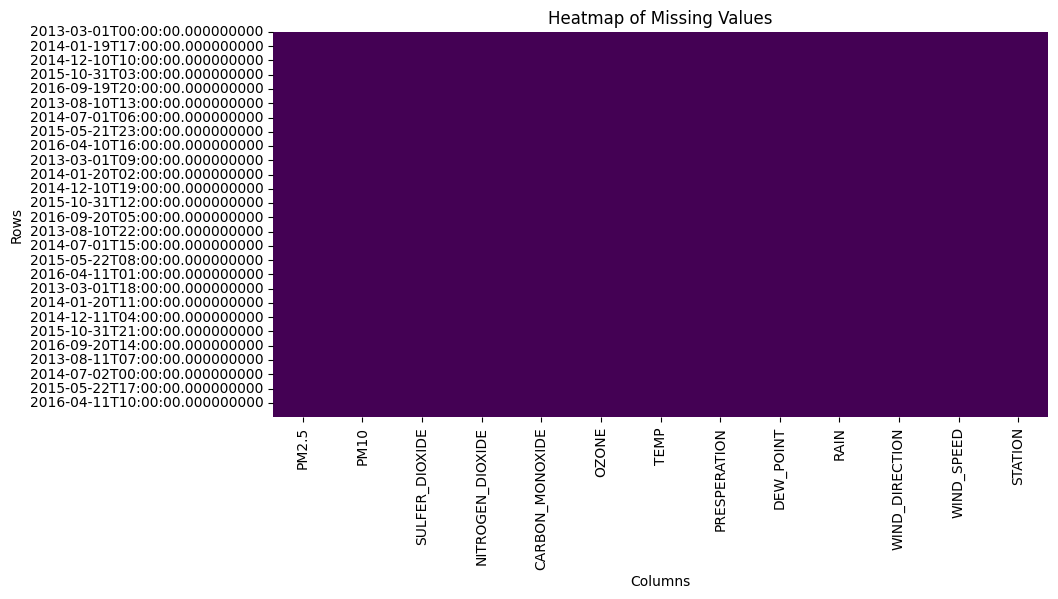

In [418]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [419]:
data.head()

,PM2.5,PM10,SULFER_DIOXIDE,NITROGEN_DIOXIDE,CARBON_MONOXIDE,OZONE,TEMP,PRESPERATION,DEW_POINT,RAIN,WIND_DIRECTION,WIND_SPEED,STATION
DATETIME,,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,337.5,5.7,Tiantan
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,315.0,3.9,Tiantan
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,337.5,5.3,Tiantan
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,0.0,4.9,Tiantan
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,337.5,3.2,Tiantan


In [420]:
data.describe()

,PM2.5,PM10,SULFER_DIOXIDE,NITROGEN_DIOXIDE,CARBON_MONOXIDE,OZONE,TEMP,PRESPERATION,DEW_POINT,RAIN,WIND_DIRECTION,WIND_SPEED
count,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000
mean,81.982767,107.025951,16.843950,54.002332,1291.360169,57.018399,13.678446,1011.461241,2.447475,0.063985,157.913030,1.814795
std,82.325716,93.202605,22.486387,34.412511,1189.099280,57.184656,11.417968,10.470408,13.779915,0.804384,108.057701,1.262233
min,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000,0.000000
25%,21.000000,38.000000,3.000000,27.000000,500.000000,10.000000,3.200000,1002.900000,-8.900000,0.000000,67.500000,1.000000
50%,57.000000,84.000000,8.000000,47.000000,900.000000,44.000000,14.600000,1011.000000,3.000000,0.000000,135.000000,1.500000
75%,113.000000,147.000000,21.000000,74.000000,1600.000000,81.000000,23.400000,1019.900000,15.000000,0.000000,247.500000,2.300000
max,999.000000,999.000000,411.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,337.500000,13.200000


In [421]:
data.dtypes

,0
PM2.5,float64
PM10,float64
SULFER_DIOXIDE,float64
NITROGEN_DIOXIDE,float64
CARBON_MONOXIDE,float64
OZONE,float64
TEMP,float64
PRESPERATION,float64
DEW_POINT,float64
RAIN,float64


# **Feature Engineering**

In [422]:
def calculate_aqi_pm25(pm25):
    if pm25 <= 12.0:
        return (0, "Good")
    elif pm25 <= 35.4:
        return (1, "Moderate")
    elif pm25 <= 55.4:
        return (2, "Unhealthy for Sensitive Groups")
    elif pm25 <= 150.4:
        return (3, "Unhealthy")
    elif pm25 <= 250.4:
        return (4, "Very Unhealthy")
    else:
        return (5, "Hazardous")

# Apply AQI calculation to dataset
data['PM2.5_AQI'], data['AQI_CATEGORY'] = zip(*data['PM2.5'].apply(calculate_aqi_pm25))

# View AQI categories
print(data[['PM2.5', 'PM2.5_AQI', 'AQI_CATEGORY']].head())


                     PM2.5  PM2.5_AQI AQI_CATEGORY
DATETIME                                          
2013-03-01 00:00:00    6.0          0         Good
2013-03-01 01:00:00    6.0          0         Good
2013-03-01 02:00:00    6.0          0         Good
2013-03-01 03:00:00    6.0          0         Good
2013-03-01 04:00:00    5.0          0         Good


In [423]:
def calculate_aqi_pm10(pm10):
    if pm10 <= 54:
        return (0, "Good")
    elif pm10 <= 154:
        return (1, "Moderate")
    elif pm10 <= 254:
        return (2, "Unhealthy for Sensitive Groups")
    elif pm10 <= 354:
        return (3, "Unhealthy")
    elif pm10 <= 424:
        return (4, "Very Unhealthy")
    else:
        return (5, "Hazardous")

# Apply AQI calculation to dataset
data['PM10_AQI'], data['PM10_AQI_CATEGORY'] = zip(*data['PM10'].apply(calculate_aqi_pm10))

# View AQI categories
print(data[['PM10', 'PM10_AQI', 'PM10_AQI_CATEGORY']].head())


                     PM10  PM10_AQI PM10_AQI_CATEGORY
DATETIME                                             
2013-03-01 00:00:00   6.0         0              Good
2013-03-01 01:00:00  29.0         0              Good
2013-03-01 02:00:00   6.0         0              Good
2013-03-01 03:00:00   6.0         0              Good
2013-03-01 04:00:00   5.0         0              Good


In [283]:
# def calculate_aqi_pm10(pm10):
#     if pm10 <= 54:
#         return "Good"
#     elif pm10 <= 154:
#         return "Moderate"
#     elif pm10 <= 254:
#         return "Unhealthy for Sensitive Groups"
#     elif pm10 <= 354:
#         return "Unhealthy"
#     elif pm10 <= 424:
#         return "Very Unhealthy"
#     else:
#         return "Hazardous"

# # Apply AQI calculation to dataset
# data['PM10_AQI'] =  data['PM10'].apply(calculate_aqi_pm10)

# # View AQI categories
# print(data[['PM10', 'PM10_AQI']].head())


                     PM10 PM10_AQI
DATETIME                          
2013-03-01 00:00:00   6.0     Good
2013-03-01 01:00:00  29.0     Good
2013-03-01 02:00:00   6.0     Good
2013-03-01 03:00:00   6.0     Good
2013-03-01 04:00:00   5.0     Good


In [284]:
# def calculate_aqi_so2(so2):
#     if so2 <= 35:
#         return "Good"
#     elif so2 <= 75:
#         return "Moderate"
#     elif so2 <= 185:
#         return "Unhealthy for Sensitive Groups"
#     elif so2 <= 304:
#         return "Unhealthy"
#     elif so2 <= 604:
#         return "Very Unhealthy"
#     else:
#         return "Hazardous"

# # Apply the function to calculate SO₂ AQI
# data['SO2_AQI'] = data['SULFER_DIOXIDE'].apply(calculate_aqi_so2)
# print(data[['SULFER_DIOXIDE', 'SO2_AQI']].head())


                     SULFER_DIOXIDE SO2_AQI
DATETIME                                   
2013-03-01 00:00:00             4.0    Good
2013-03-01 01:00:00             5.0    Good
2013-03-01 02:00:00             4.0    Good
2013-03-01 03:00:00             4.0    Good
2013-03-01 04:00:00             7.0    Good


In [285]:
# def calculate_aqi_no2(no2):
#     if no2 <= 53:
#         return "Good"
#     elif no2 <= 100:
#         return "Moderate"
#     elif no2 <= 360:
#         return "Unhealthy for Sensitive Groups"
#     elif no2 <= 649:
#         return "Unhealthy"
#     elif no2 <= 1249:
#         return "Very Unhealthy"
#     else:
#         return "Hazardous"

# # Apply the function to calculate NO₂ AQI
# data['NO2_AQI'] = data['NITROGEN_DIOXIDE'].apply(calculate_aqi_no2)
# print(data[['NITROGEN_DIOXIDE', 'NO2_AQI']].head())


                     NITROGEN_DIOXIDE NO2_AQI
DATETIME                                     
2013-03-01 00:00:00               8.0    Good
2013-03-01 01:00:00               9.0    Good
2013-03-01 02:00:00              12.0    Good
2013-03-01 03:00:00              12.0    Good
2013-03-01 04:00:00              15.0    Good


In [286]:
# def calculate_aqi_co(co):
#     if co <= 4.4:
#         return "Good"
#     elif co <= 9.4:
#         return "Moderate"
#     elif co <= 12.4:
#         return "Unhealthy for Sensitive Groups"
#     elif co <= 15.4:
#         return "Unhealthy"
#     elif co <= 30.4:
#         return "Very Unhealthy"
#     else:
#         return "Hazardous"

# # Apply the function to calculate CO AQI
# data['CO_AQI'] = data['CARBON_MONOXIDE'].apply(calculate_aqi_co)
# print(data[['CARBON_MONOXIDE', 'CO_AQI']].head())


                     CARBON_MONOXIDE     CO_AQI
DATETIME                                       
2013-03-01 00:00:00            300.0  Hazardous
2013-03-01 01:00:00            300.0  Hazardous
2013-03-01 02:00:00            300.0  Hazardous
2013-03-01 03:00:00            300.0  Hazardous
2013-03-01 04:00:00            400.0  Hazardous


In [427]:
# Overall AQI
data['OVERALL_AQI'] = data[['PM2.5_AQI','PM10_AQI']].max(axis=1)

# View Overall AQI categories
print(data[['OVERALL_AQI']].head())


                     OVERALL_AQI
DATETIME                        
2013-03-01 00:00:00            0
2013-03-01 01:00:00            0
2013-03-01 02:00:00            0
2013-03-01 03:00:00            0
2013-03-01 04:00:00            0


In [288]:
# # Assign numeric weights to AQI categories
# aqi_weights = {
#     "Good": 0,
#     "Moderate": 1,
#     "Unhealthy for Sensitive Groups": 2,
#     "Unhealthy": 3,
#     "Very Unhealthy": 4,
#     "Hazardous": 5
# }

# # Map AQI categories to numeric levels
# data['SO2_Level'] = data['SO2_AQI'].map(aqi_weights)
# data['NO2_Level'] = data['NO2_AQI'].map(aqi_weights)
# data['CO_Level'] = data['CO_AQI'].map(aqi_weights)
# data['PM2.5_Level'] = data['PM2.5_AQI'].map(aqi_weights)
# data['PM10_Level'] = data['PM10_AQI'].map(aqi_weights)

# # Compute the overall pollution level (maximum level across pollutants)
# data['pollution_level'] = data[['SO2_Level', 'NO2_Level', 'CO_Level', 'PM2.5_Level', 'PM10_Level']].max(axis=1)

# # Map back to AQI category names
# reverse_weights = {v: k for k, v in aqi_weights.items()}
# data['pollution_level_category'] = data['pollution_level'].map(reverse_weights)

# print(data[['SULFER_DIOXIDE', 'NITROGEN_DIOXIDE', 'CARBON_MONOXIDE',
#             'pollution_level', 'pollution_level_category']].head())


                     SULFER_DIOXIDE  NITROGEN_DIOXIDE  CARBON_MONOXIDE  \
DATETIME                                                                 
2013-03-01 00:00:00             4.0               8.0            300.0   
2013-03-01 01:00:00             5.0               9.0            300.0   
2013-03-01 02:00:00             4.0              12.0            300.0   
2013-03-01 03:00:00             4.0              12.0            300.0   
2013-03-01 04:00:00             7.0              15.0            400.0   

                     pollution_level pollution_level_category  
DATETIME                                                       
2013-03-01 00:00:00              5.0                Hazardous  
2013-03-01 01:00:00              5.0                Hazardous  
2013-03-01 02:00:00              5.0                Hazardous  
2013-03-01 03:00:00              5.0                Hazardous  
2013-03-01 04:00:00              5.0                Hazardous  


<ipython-input-428-3f8f09ee19ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OVERALL_AQI', data=data, palette='viridis')


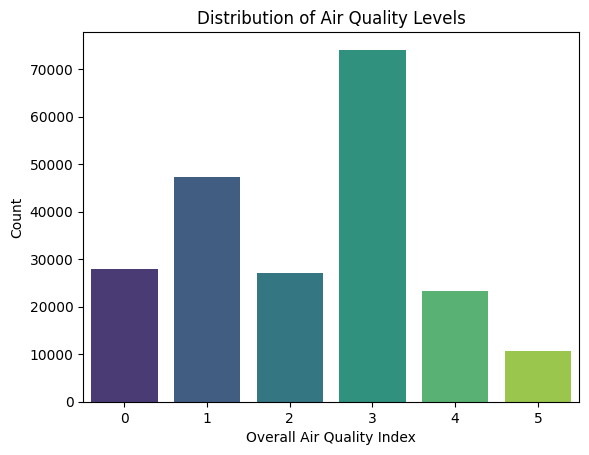

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of pollution levels
sns.countplot(x='OVERALL_AQI', data=data, palette='viridis')
plt.title('Distribution of Air Quality Levels')
plt.xlabel('Overall Air Quality Index')
plt.ylabel('Count')
plt.show()


In [429]:
if 'TEMP' in data.columns and 'DEW_POINT' in data.columns:
    data['TEMP_HUMIDITY_INTERACTION'] = data['TEMP'] * data['DEW_POINT']


In [430]:
data.columns

Index(['PM2.5', 'PM10', 'SULFER_DIOXIDE', 'NITROGEN_DIOXIDE',
       'CARBON_MONOXIDE', 'OZONE', 'TEMP', 'PRESPERATION', 'DEW_POINT', 'RAIN',
       'WIND_DIRECTION', 'WIND_SPEED', 'STATION', 'PM2.5_AQI', 'AQI_CATEGORY',
       'PM10_AQI', 'PM10_AQI_CATEGORY', 'OVERALL_AQI',
       'TEMP_HUMIDITY_INTERACTION'],
      dtype='object')

Save the Clean Dataset to the Google Drive.

In [431]:
data.to_csv("/content/drive/MyDrive/ColabNotebooks/DatasetCMP7005/MergeDataSet/Preprocessed-Beijing-Multi-Site-Air-Quality.CSV", index=False)

# **EDA**

Display the first few rows

In [432]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
                     PM2.5  PM10  SULFER_DIOXIDE  NITROGEN_DIOXIDE  \
DATETIME                                                             
2013-03-01 00:00:00    6.0   6.0             4.0               8.0   
2013-03-01 01:00:00    6.0  29.0             5.0               9.0   
2013-03-01 02:00:00    6.0   6.0             4.0              12.0   
2013-03-01 03:00:00    6.0   6.0             4.0              12.0   
2013-03-01 04:00:00    5.0   5.0             7.0              15.0   

                     CARBON_MONOXIDE  OZONE  TEMP  PRESPERATION  DEW_POINT  \
DATETIME                                                                     
2013-03-01 00:00:00            300.0   81.0  -0.5        1024.5      -21.4   
2013-03-01 01:00:00            300.0   80.0  -0.7        1025.1      -22.1   
2013-03-01 02:00:00            300.0   75.0  -1.2        1025.3      -24.6   
2013-03-01 03:00:00            300.0   74.0  -1.4        1026.2      -25.5   
2013-03-01 04:00:00    

In [433]:
print("Statistical Summary:")
print(data.describe().T)


Statistical Summary:
                              count         mean          std       min  \
PM2.5                      210384.0    81.982767    82.325716    2.0000   
PM10                       210384.0   107.025951    93.202605    2.0000   
SULFER_DIOXIDE             210384.0    16.843950    22.486387    0.2856   
NITROGEN_DIOXIDE           210384.0    54.002332    34.412511    1.8477   
CARBON_MONOXIDE            210384.0  1291.360169  1189.099280  100.0000   
OZONE                      210384.0    57.018399    57.184656    0.2142   
TEMP                       210384.0    13.678446    11.417968  -16.8000   
PRESPERATION               210384.0  1011.461241    10.470408  982.4000   
DEW_POINT                  210384.0     2.447475    13.779915  -35.3000   
RAIN                       210384.0     0.063985     0.804384    0.0000   
WIND_DIRECTION             210384.0   157.913030   108.057701    0.0000   
WIND_SPEED                 210384.0     1.814795     1.262233    0.0000   
PM2.

In [434]:
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n", data[col].value_counts(), "\n")


Value counts for STATION:
 STATION
Aotizhongxin     35064
Changping        35064
Dongsi           35064
Nongzhanguan     35064
Tiantan          35064
Wanshouxigong    35064
Name: count, dtype: int64 

Value counts for AQI_CATEGORY:
 AQI_CATEGORY
Unhealthy                         74313
Moderate                          45757
Good                              30279
Unhealthy for Sensitive Groups    26767
Very Unhealthy                    23186
Hazardous                         10082
Name: count, dtype: int64 

Value counts for PM10_AQI_CATEGORY:
 PM10_AQI_CATEGORY
Moderate                          89514
Good                              72984
Unhealthy for Sensitive Groups    32946
Unhealthy                         10093
Very Unhealthy                     2475
Hazardous                          2372
Name: count, dtype: int64 



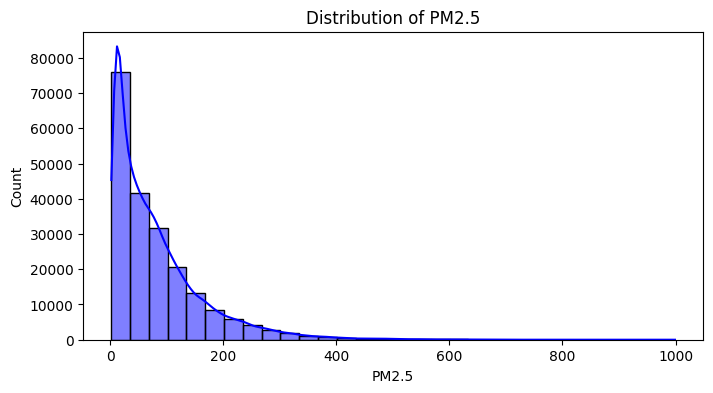

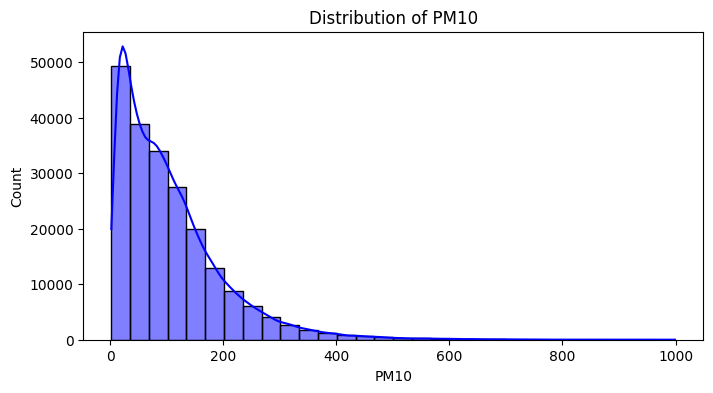

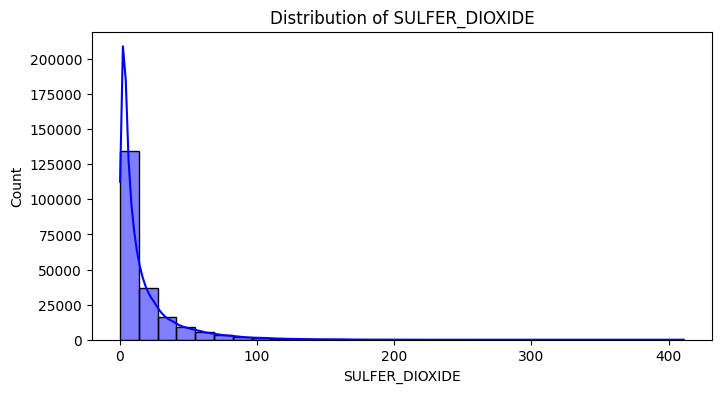

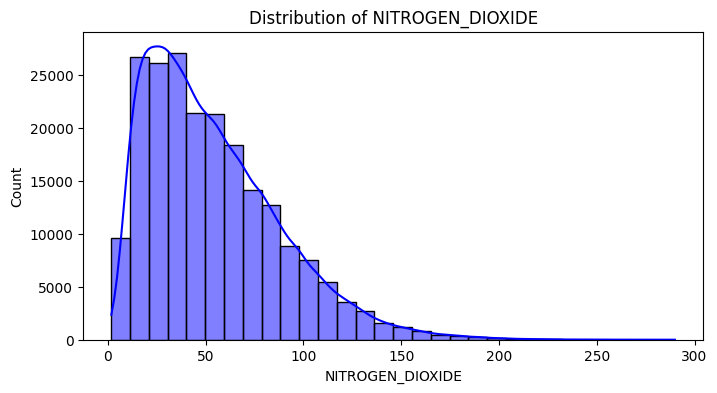

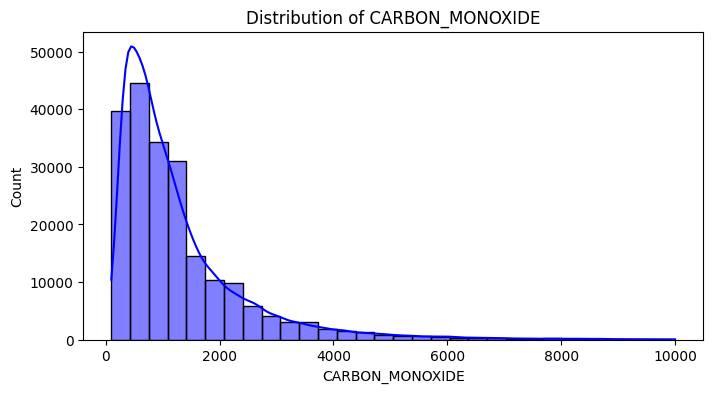

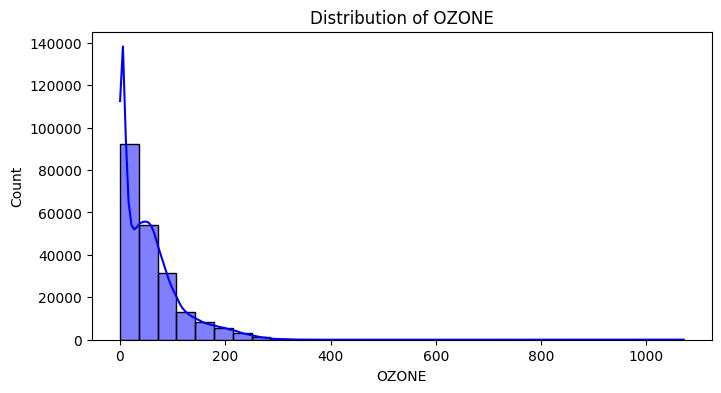

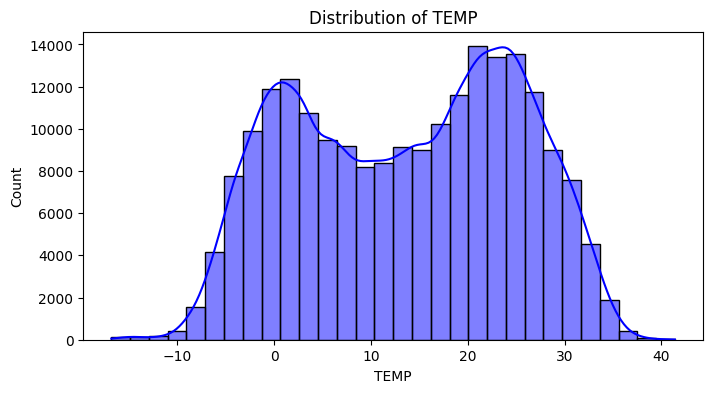

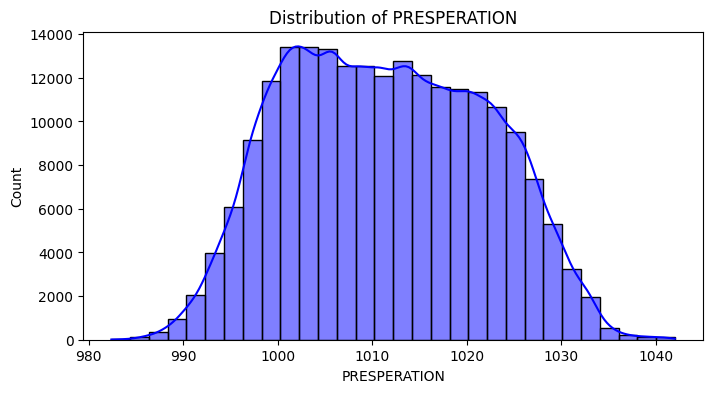

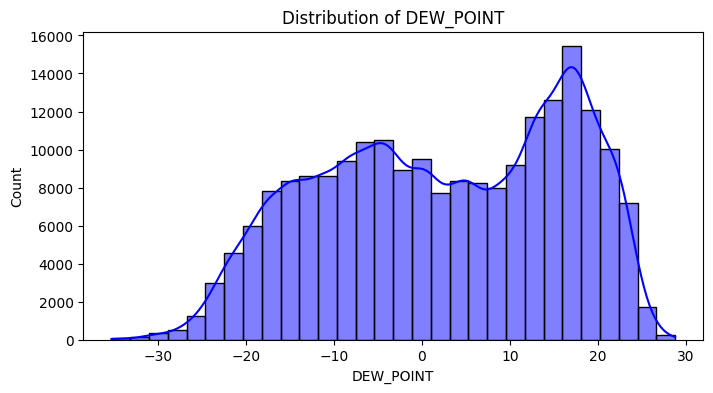

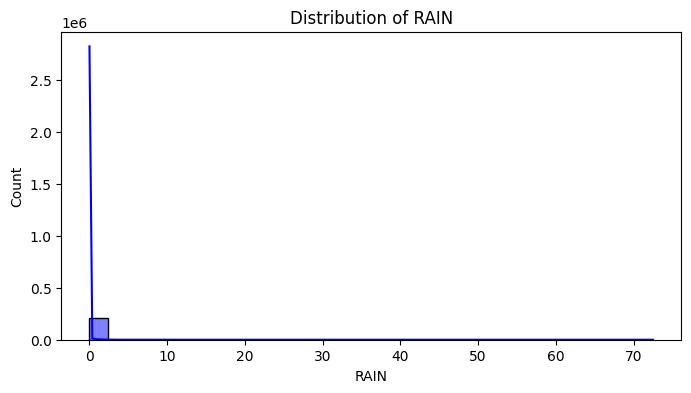

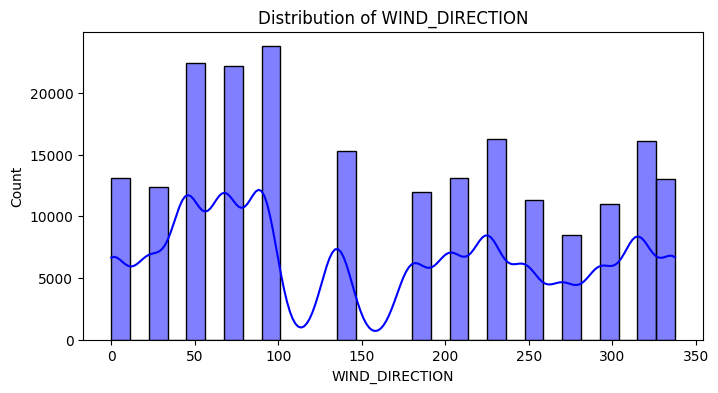

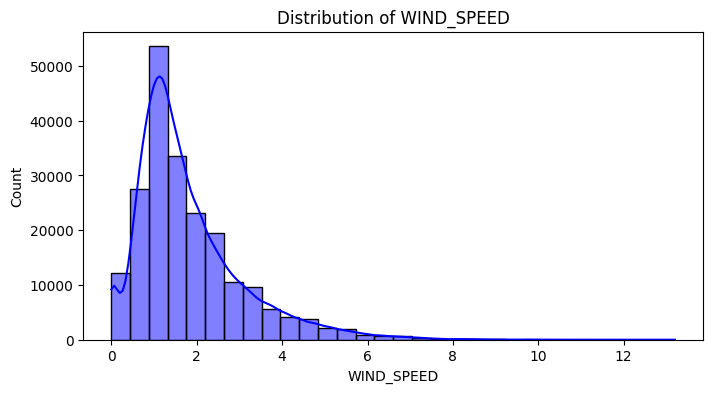

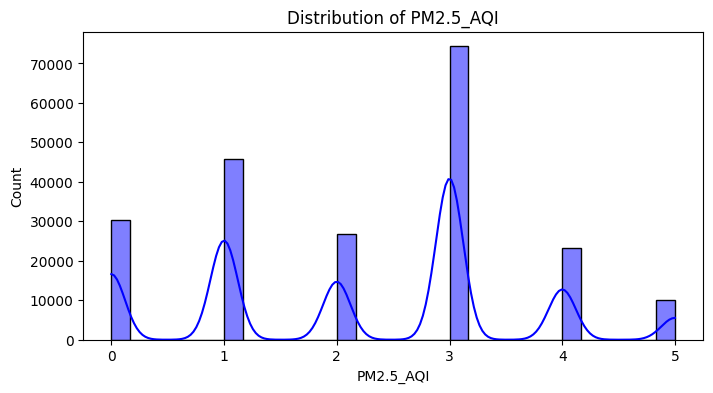

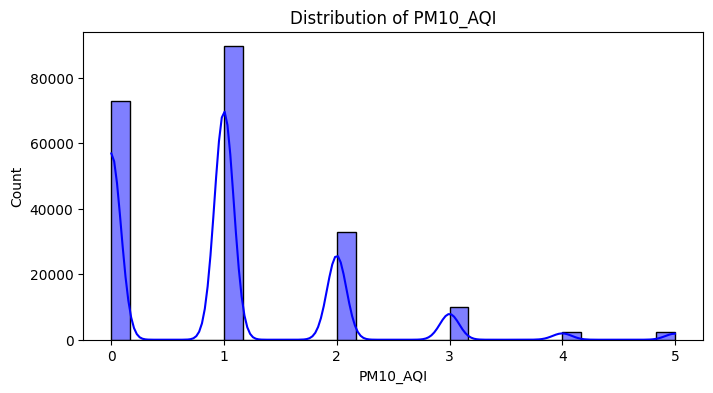

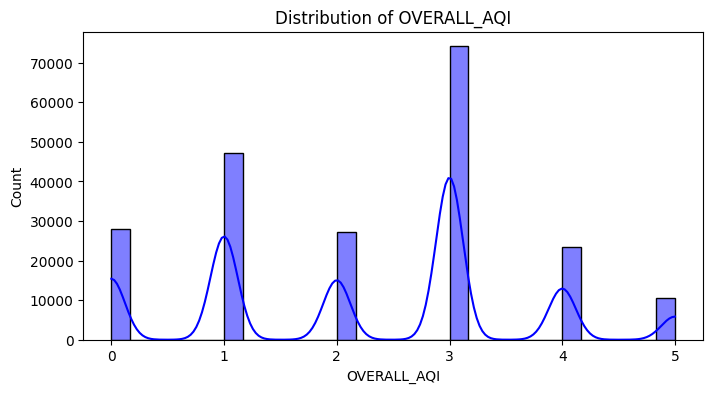

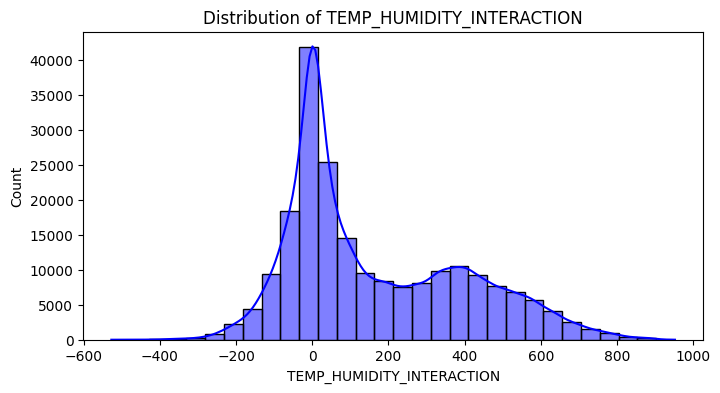

In [435]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()


<ipython-input-436-e7a409f60e56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


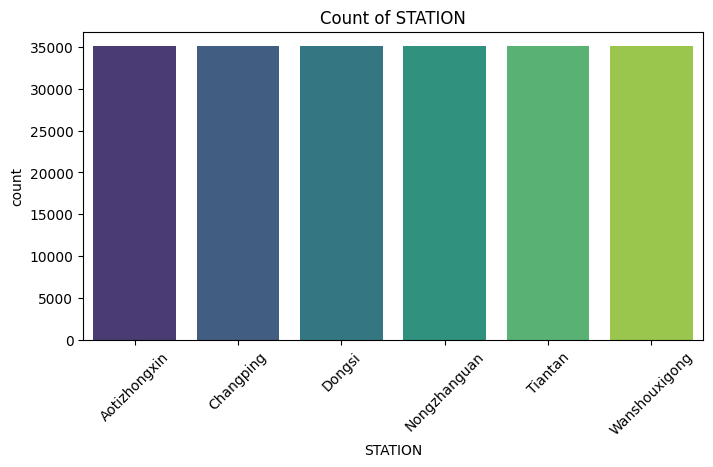

<ipython-input-436-e7a409f60e56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


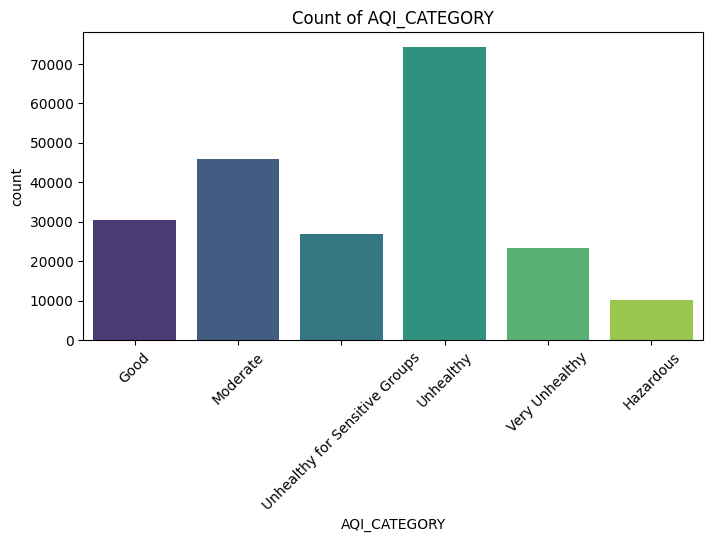

<ipython-input-436-e7a409f60e56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="viridis")


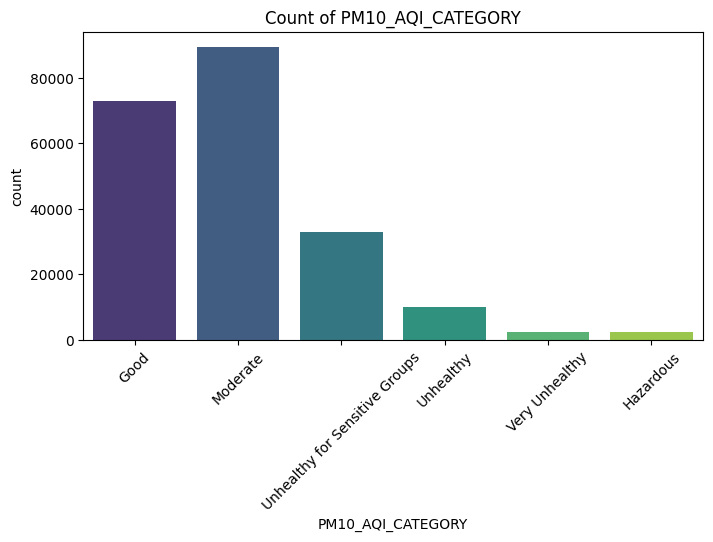

In [436]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

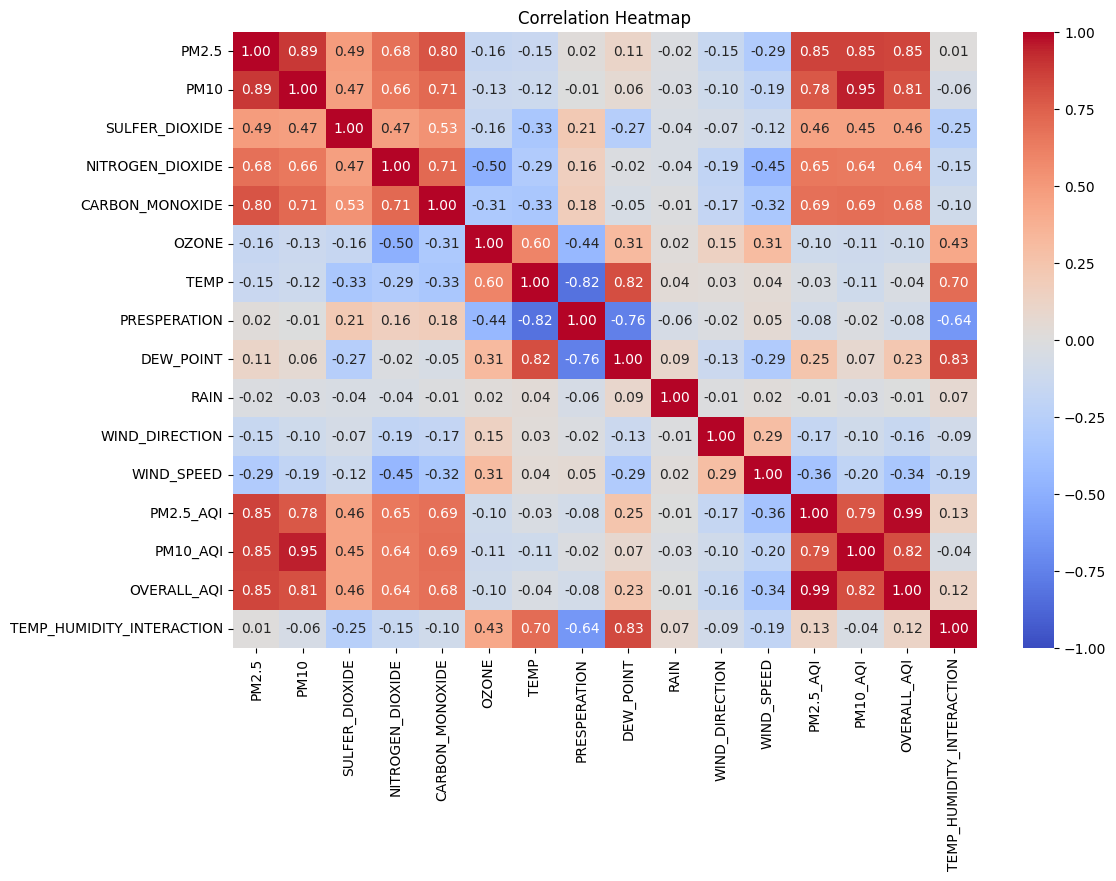

In [437]:
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


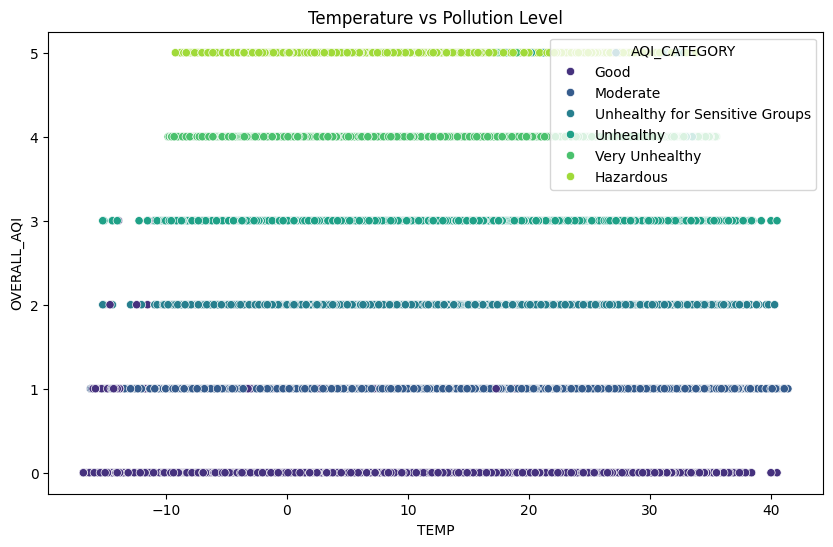

In [443]:
# Example: Relationship between temperature and pollution level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="TEMP", y="OVERALL_AQI", hue="AQI_CATEGORY", palette="viridis")
plt.title("Temperature vs Pollution Level")
plt.show()


<ipython-input-446-f927f5d76720>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="AQI_CATEGORY", y="OVERALL_AQI", palette="Set3")


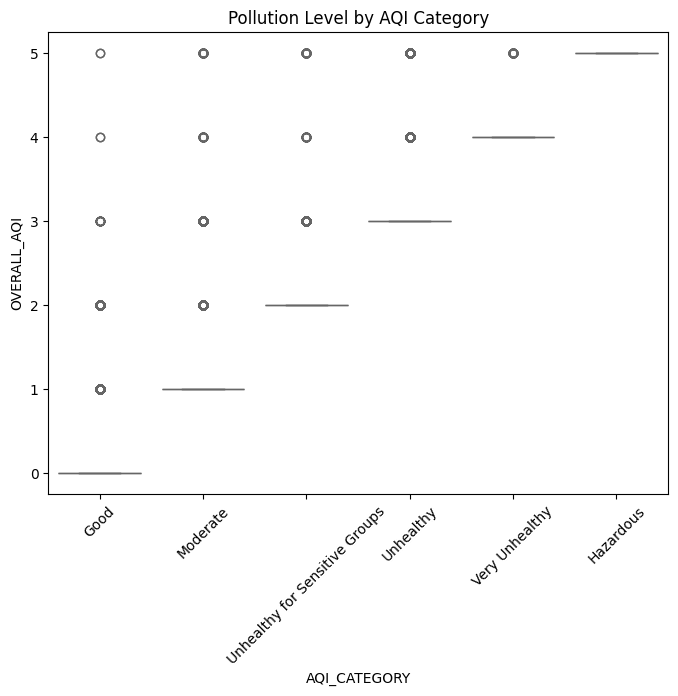

In [446]:
# Example: Pollution level across AQI categories
if 'AQI_CATEGORY' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x="AQI_CATEGORY", y="OVERALL_AQI", palette="Set3")
    plt.title("Pollution Level by AQI Category")
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


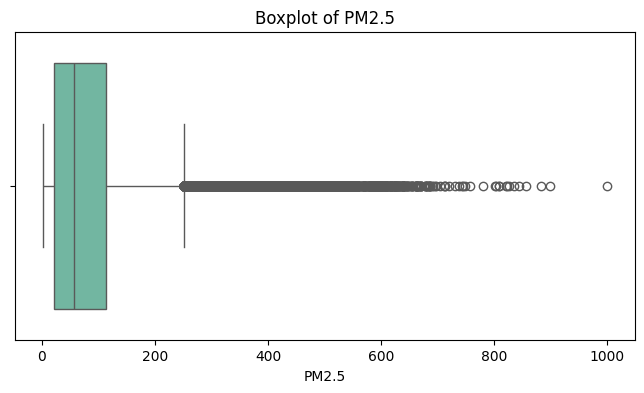

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


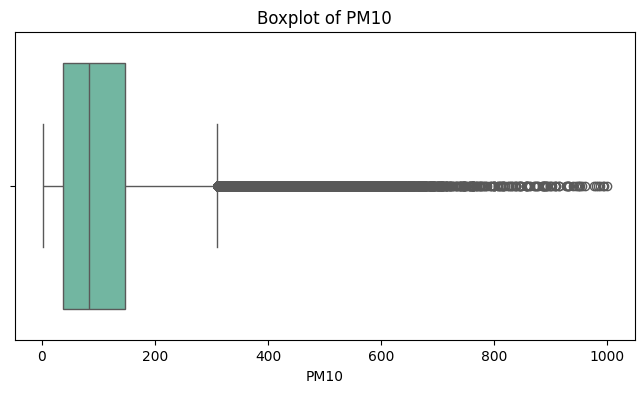

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


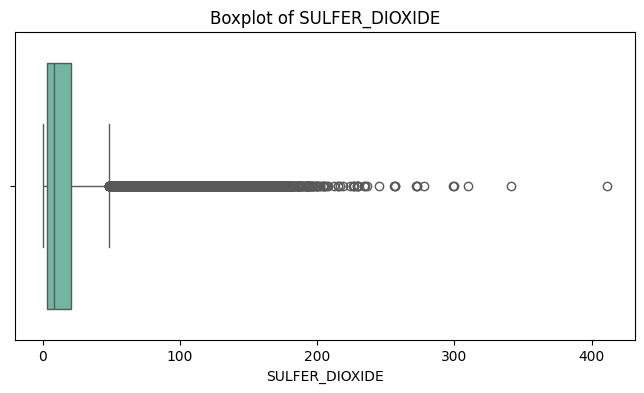

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


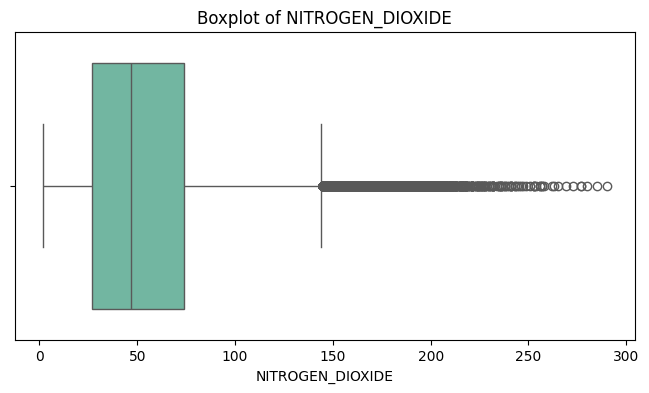

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


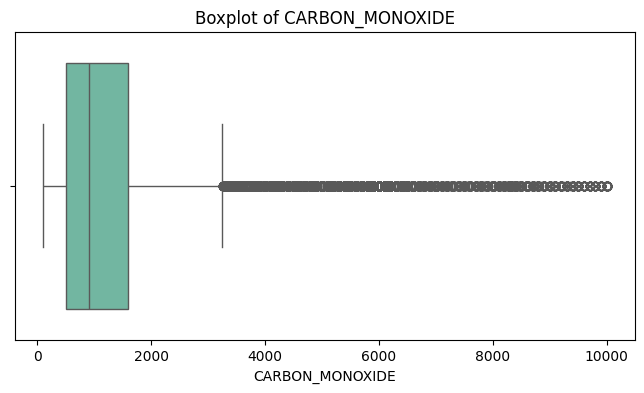

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


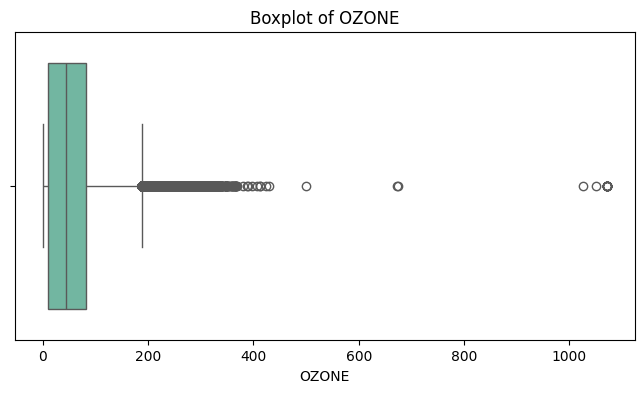

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


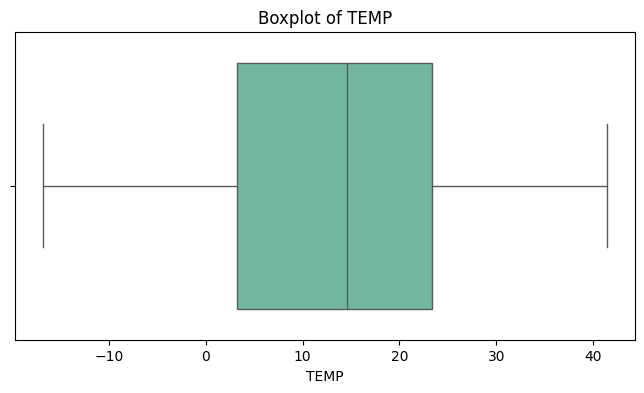

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


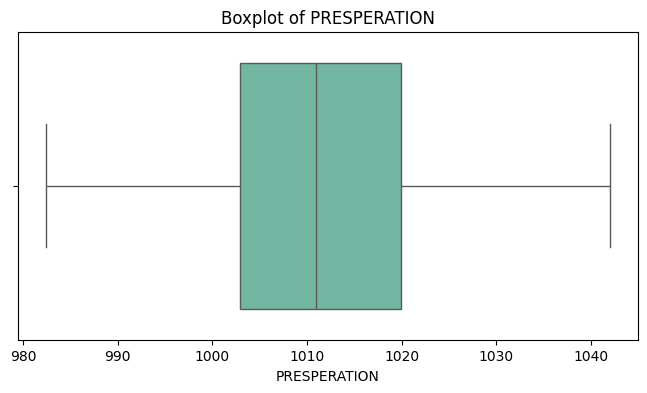

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


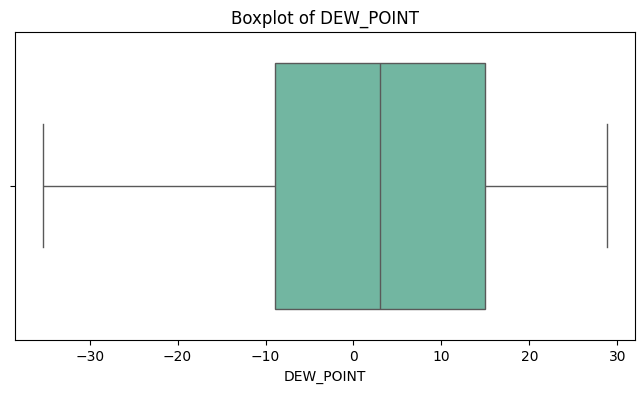

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


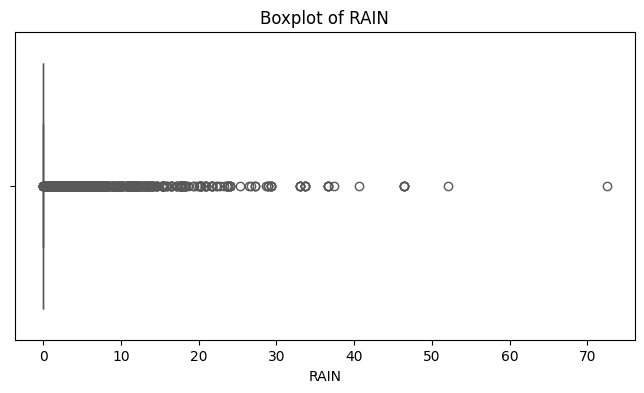

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


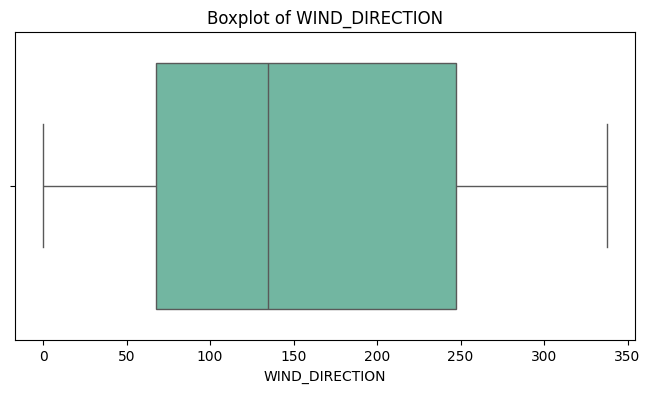

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


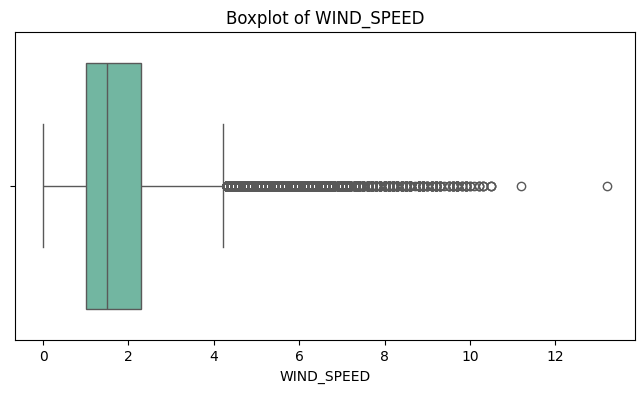

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


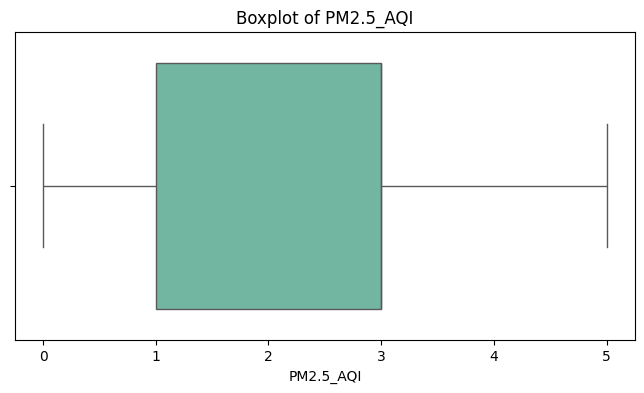

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


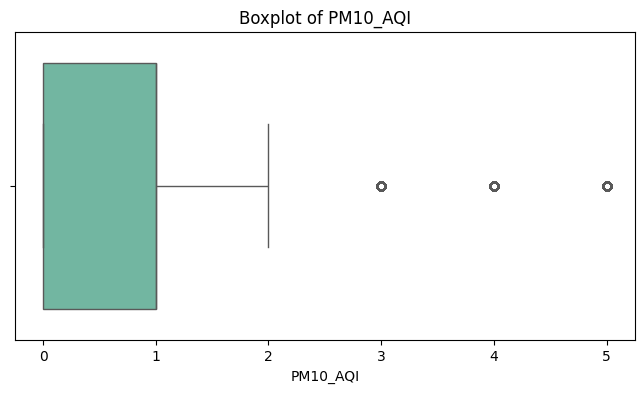

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


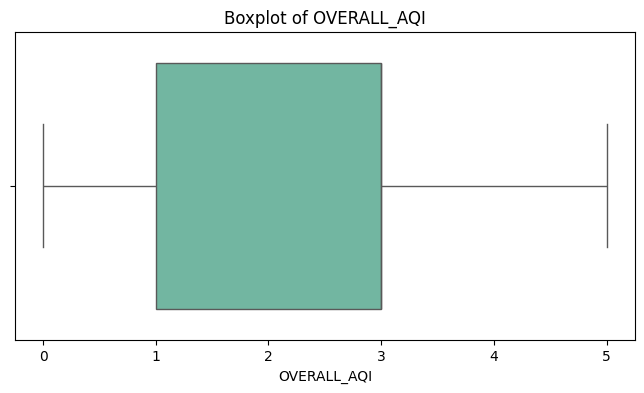

<ipython-input-447-6fbac6ac3e2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set2")


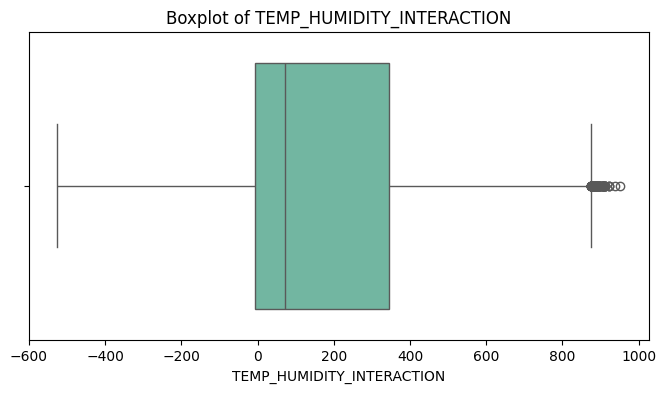

In [447]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [448]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(data[numerical_cols])
outliers = (np.abs(z_scores) > 3).sum(axis=0)
print("Number of outliers per feature:")
print(outliers)


Number of outliers per feature:
PM2.5                        3762
PM10                         3479
SULFER_DIOXIDE               4911
NITROGEN_DIOXIDE             2120
CARBON_MONOXIDE              4667
OZONE                        3353
TEMP                            0
PRESPERATION                    0
DEW_POINT                       0
RAIN                         1292
WIND_DIRECTION                  0
WIND_SPEED                   3345
PM2.5_AQI                       0
PM10_AQI                     4847
OVERALL_AQI                     0
TEMP_HUMIDITY_INTERACTION     243
dtype: int64


In [450]:
# if 'DATETIME' in data.columns:
#     data['DATETIME'] = pd.to_datetime(data['Day'])
#     time_data = data.groupby(data['DATETIME'].dt.to_period("M")).mean()

#     # Plot trends
#     time_data.index = time_data.index.to_timestamp()
#     plt.figure(figsize=(12, 6))
#     plt.plot(time_data.index, time_data['OVERALL_AQI'], label="Pollution Level", marker="o")
#     plt.title("Monthly Average Pollution Levels")
#     plt.xlabel("Month")
#     plt.ylabel("Pollution Level")
#     plt.legend()
#     plt.show()


In [328]:
# if 'Hour' in data.columns:
#     hourly_data = data.groupby('Hour').mean()

#     plt.figure(figsize=(10, 6))
#     plt.plot(hourly_data.index, hourly_data['pollution_level'], label="Pollution Level", color="red", marker="o")
#     plt.title("Hourly Trend in Pollution Levels")
#     plt.xlabel("Hour")
#     plt.ylabel("Pollution Level")
#     plt.legend()
#     plt.show()


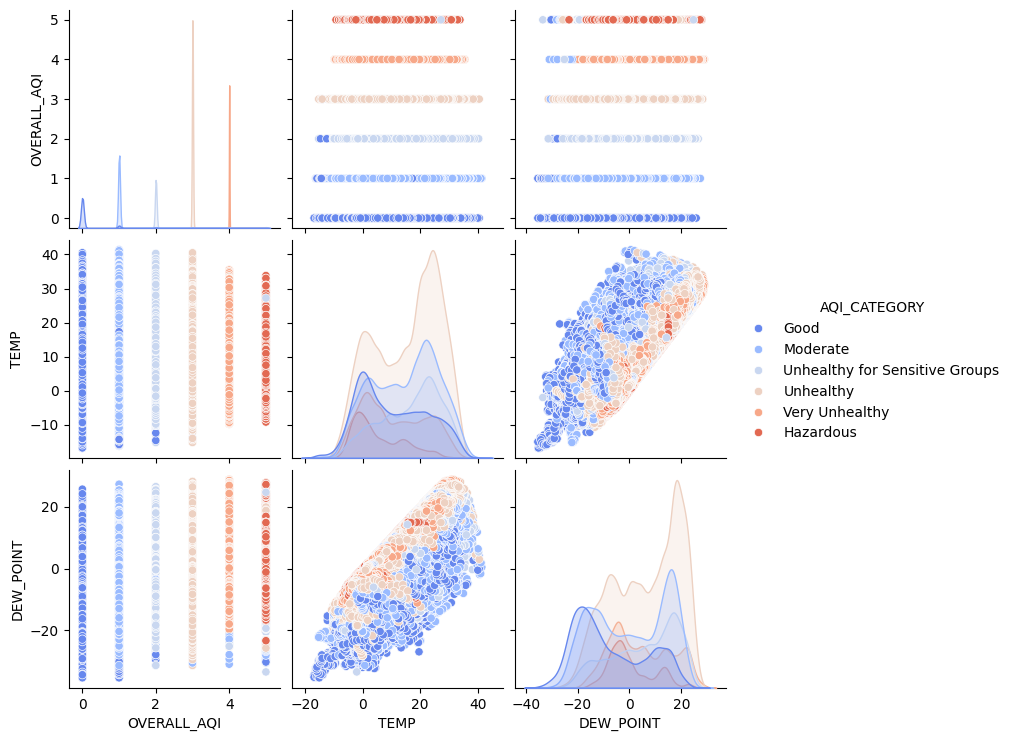

In [452]:
sns.pairplot(data, vars=['OVERALL_AQI', 'TEMP', 'DEW_POINT'], hue="AQI_CATEGORY", palette="coolwarm")
plt.show()
